<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Módulo 02
## Laboratorio Clase 06: Desarrollo de Algoritmos

### Instrucciones


* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* La escala es de 0 a 4 considerando solo valores enteros.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_cYY_lab_apellido_nombre.zip` a alonso.ogueda@gmail.com. 
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.
* __La entrega es al final de esta clase.__

__Nombre__:

__Rol__:

## Ejercicio 1 (2 ptos.): 
Utilizando los datos del Gasto Fiscal Neto de Chile, crea una nueva columna del tipo `datetime` llamada `dt_date` utilizando `anio`, `mes` y el día primero de cada mes.

In [1]:
import os
import numpy as np
import pandas as pd

Utilizaremos como ejemplo un dataset de gasto fiscal neto en Chile, obtenidos de una [datathon de DataCampfire](https://datacampfire.com/datathon/).

In [2]:
gasto_raw = pd.read_csv(os.path.join("data", "gasto_fiscal.csv"), sep=";")
gasto_raw.head()

,anio,mes,partida,capitulo,programa,subtitulo,monto
0,2009,Abril,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,ADQUISICIÓN DE ACTIVOS NO FINANCIEROS,21082
1,2009,Abril,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,BIENES Y SERVICIOS DE CONSUMO,152607
2,2009,Abril,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,GASTOS EN PERSONAL,552668
3,2009,Abril,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,INICIATIVAS DE INVERSIÓN,4741
4,2009,Abril,Congreso Nacional,Biblioteca Del Congreso,Proyecto Fortalecimiento Institucional,ADQUISICIÓN DE ACTIVOS NO FINANCIEROS,26107


Pasos a seguir:

1. Renombra la columna `anio` por `year`.
2. Crea la columna `month` utilizando el diccionario `es_month_dict` definido abajo. Hint: Usar un mapeo.
3. Crea la columna `day` en que todos los registros sean igual a `1`.
4. Crea la columna `dt_date` con la función `pd.to_datetime`. Lee la documentación!
5. Finalmente, elimina las columnas `year`, `mes`, `month`, `day`.

In [3]:
es_month_dict = {
    'enero': 1,
    'febrero': 2,
    'marzo': 3, 
    'abril': 4,
    'mayo': 5,
    'junio': 6,
    'julio': 7,
    'agosto': 8,
    'septiembre': 9,
    'octubre': 10,
    'noviembre': 11,
    'diciembre': 12
}

In [5]:
gasto = (
    gasto_raw.rename(columns={'anio':'year'})
    .assign(
        month=lambda x: x["mes"].str.lower().map(es_month_dict), ## FIX ME - Map ##,
        day=1, 
        dt_date=lambda x: pd.to_datetime(x[['year','month','day']]))
    .drop(columns=['year', 'month', 'mes', 'day'])
)
gasto.head()

,partida,capitulo,programa,subtitulo,monto,dt_date
0,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,ADQUISICIÓN DE ACTIVOS NO FINANCIEROS,21082,2009-04-01
1,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,BIENES Y SERVICIOS DE CONSUMO,152607,2009-04-01
2,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,GASTOS EN PERSONAL,552668,2009-04-01
3,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,INICIATIVAS DE INVERSIÓN,4741,2009-04-01
4,Congreso Nacional,Biblioteca Del Congreso,Proyecto Fortalecimiento Institucional,ADQUISICIÓN DE ACTIVOS NO FINANCIEROS,26107,2009-04-01


## Ejercicio 2 (1 pto.)

Pivotea el dataframe `gasto_raw` tal que:

- Los índices sean los ministerios (partidas).
- Las columnas sean los años.
- Cada celda sea la suma de los montos.
- Rellenar las celdas vacías con `""`.

¿Cuáles son las combinaciones de Año-Ministerio que no tienen gasto?

In [27]:
df=gasto_raw.pivot_table(
    index="partida",
    columns="anio",
    values="monto",
    aggfunc="sum",
    fill_value=""
)



anio,2009,2010,2011,2012,2013,2014,2015,2016
partida,,,,,,,,
Ministerio De Energía,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ministerio De La Mujer Y La Equidad De Género,,,,,,,,NaN
Ministerio Del Deporte,,,,,,NaN,NaN,NaN
Ministerio Del Medio Ambiente,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Servicio Electoral,,,,,,,,


__Respuesta__: (2009-Ministerio De Energía), (2009-Ministerio De la mujer Y La equidad De Género), (2009-Ministerio Del Deporte), (2009-Ministerio Del Medio Ambiente), (2009-Servicio Electoral), (2010-Ministerio De la mujer Y La equidad De Género), (2010-Ministerio Del Deporte), (2010-Servicio Electoral), (2011-Ministerio De la mujer Y La equidad De Género), (2011-Ministerio Del Deporte), (2011-Servicio Electoral), (2012-Ministerio De la mujer Y La equidad De Género), (2012-Ministerio Del Deporte), (2012-Servicio Electoral), (2013-Ministerio De la mujer Y La equidad De Género), (2013-Ministerio Del Deporte), (2013-Servicio Electoral), (2014-Ministerio De la mujer Y La equidad De Género), (2014-Servicio Electoral), (2015-Ministerio De la mujer Y La equidad De Género), (2015-Servicio Electoral), (2016-Servicio Electoral)

## Ejercicio 3 (1 pto.)

Realiza los benchmarks del archivo `benchmark_loop.py` que se encuentra en el directorio `fast_pandas`.

¿Cuál forma dirías que es la más eficiente?

Utiliza el comando mágico `%load` y edita de tal manera que el módulo `Benchmarker` se importe correctamente.

Benchmarking function:  df_values
	Testing with a dataframe of size:  100
	Result (seconds):  1.627541999823734e-05
	Testing with a dataframe of size:  1000
	Result (seconds):  0.00015004108999619348
	Testing with a dataframe of size:  10000
	Result (seconds):  0.0012578255999869726
	Testing with a dataframe of size:  100000
	Result (seconds):  0.011132089600005201
	Testing with a dataframe of size:  1000000
	Result (seconds):  0.10895415699997102
Benchmarking function:  itertuples_function
	Testing with a dataframe of size:  100
	Result (seconds):  0.00033409428000140905
	Testing with a dataframe of size:  1000
	Result (seconds):  0.0006721118299992668
	Testing with a dataframe of size:  10000
	Result (seconds):  0.004183849199989709
	Testing with a dataframe of size:  100000
	Result (seconds):  0.041128782400028284
	Testing with a dataframe of size:  1000000
	Result (seconds):  0.4513969760000691
Benchmarking function:  iterrows_function
	Testing with a dataframe of size:  100
	Resul

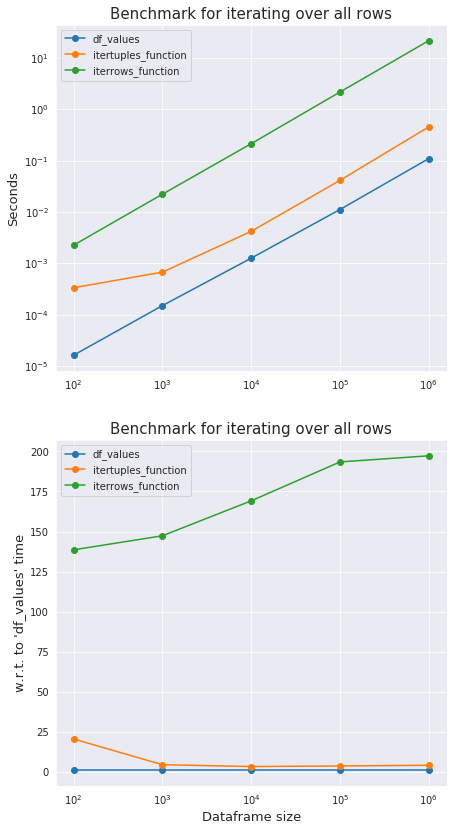

In [33]:
# %load fast_pandas/benchmark_loop.py
from fast_pandas.Benchmarker import Benchmarker


def iterrows_function(df):
    for index, row in df.iterrows():
        pass


def itertuples_function(df):
    for row in df.itertuples():
        pass


def df_values(df):
    for row in df.values:
        pass



params = {
    "df_generator": 'pd.DataFrame(np.random.randint(1, df_size, (df_size, 4)), columns=list("ABCD"))',
    "functions_to_evaluate": [df_values, itertuples_function, iterrows_function],
    "title": "Benchmark for iterating over all rows",
    "user_df_size_powers": [2, 3, 4, 5, 6],
    "user_loop_size_powers": [2, 2, 1, 1, 1],
}

benchmark = Benchmarker(**params)
benchmark.benchmark_all()
benchmark.print_results()
benchmark.plot_results()


__Respuesta__: El metodo más rapido es df_values para data frames.